<a href="https://colab.research.google.com/github/StrizhAXE/DataAlgoritm/blob/main/Les_2_Algs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

In [2]:
X, y, coef = datasets.make_regression(n_samples=100, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [4]:
%%time
y_pred = np.dot(X, coef)
err = calc_mse(y, y_pred)
print(f'MSE для коэф из датасета \t- {err}\n')

MSE для коэф из датасета 	- 29.34274108679351

Wall time: 1e+03 µs


In [5]:
## Градиентный спуск (Gradient Descent, GD)
def eval_GD(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    GD_err_list = []
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X))
        GD_err_list.insert(i - 1, err)
        if i % (iterations / 5) == 0:
            print(i, w, err)
    return w, GD_err_list

In [6]:
## Стохастический градиентный спуск (Stochastic Gradient Descent, SGD)
# mini-batch GD & SGD (qty_in_batch=1)
def eval_SGD(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    SGD_err_list = []
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp))
        SGD_err_list.insert(i - 1, err)
        if i % (iterations / 5) == 0:
            print(i, w, err)
    return w, SGD_err_list

In [7]:
%%time

w_gd, GD_err_list = eval_GD(X, y, iterations=3000, alpha=1e-3)
y_pred = np.dot(X, w_gd)
err_gd = calc_mse(y, y_pred)
print(f'MSE для метода градиентного спуска - {err_gd}\n')

600 [52.0435046  52.32250207] 1433.9012519426624
1200 [72.73992955 67.80706573] 219.9727169827603
1800 [81.105593   72.32264247] 56.87946576694009
2400 [84.50452903 73.61611991] 33.141210204793296
3000 [85.8909253  73.97658891] 29.47208109986519
MSE для метода градиентного спуска - 29.469951811724275

Wall time: 111 ms


In [8]:
%%time

w_sgd, SGD_err_list = eval_SGD(X, y, iterations=3000, qty_in_batch=1, alpha=1e-3) 
y_pred = np.dot(X, w_sgd)
err_sgd = calc_mse(y, y_pred)
print(f'MSE для метода стохастического градиентного спуска - {err_gd}\n')

600 [52.02076565 52.29546264] 458.13369724494237
1200 [72.72165257 67.7909023 ] 15.282837471545294
1800 [81.09447128 72.3154127 ] 3.2546606854516744
2400 [84.49845318 73.61322904] 13.715115447908913
3000 [85.8877718  73.97546854] 18.90221963667335
MSE для метода стохастического градиентного спуска - 29.469951811724275

Wall time: 4.45 s


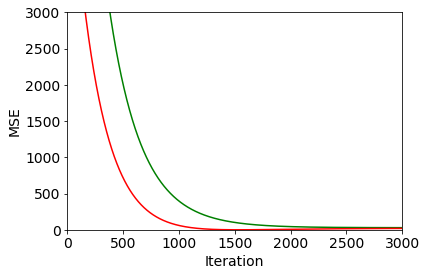

In [9]:
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.xlim( 0, 3000 )
plt.ylim( 0, 3000 )

plt.plot(range(len(GD_err_list)), GD_err_list, color='g')
plt.plot(range(len(SGD_err_list)), SGD_err_list, color='r')


Вывод: Стохастический градиентный спуск (красная линия) сходится за меньшее количесво итераций.

2. Модифицировать решение первого задания путем добавления L2 регуляризации и сравнить результаты.  

In [10]:
# Метод градиентного спуска  + L2
def eval_GD_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    GD_err_list = []
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + 2 * lambda_ * w)
        GD_err_list.insert(i - 1, err)
#        if i % (iterations / 5) == 0:
#            print(i, w, err)
    return w, GD_err_list

In [11]:
## Стохастический градиентный спуск (Stochastic Gradient Descent, SGD)  + L2
# mini-batch GD & SGD (qty_in_batch=1)
def eval_SGD_reg2(X, y, iterations, qty_in_batch=1, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    SGD_err_list = []
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp) + 2 * lambda_ * w)
        SGD_err_list.insert(i - 1, err)
        if i % (iterations / 5) == 0:
            print(i, w, err)
    return w, SGD_err_list

In [12]:
%%time

w_gd_L2, GD_err_list_L2 = eval_GD_reg2(X, y, iterations=3000, alpha=1e-3, lambda_=1e-3)
y_pred = np.dot(X, w_gd_L2)
err_gd = calc_mse(y, y_pred)
print(f'MSE для метода градиентного спуска - {err_gd}\n')

MSE для метода градиентного спуска - 29.65892162898892

Wall time: 129 ms


In [13]:
%%time

w_sgd_L2, SGD_err_list_L2 = eval_SGD_reg2(X, y, iterations=3000, qty_in_batch=1, alpha=1e-3, lambda_=1e-3) 
y_pred = np.dot(X, w_sgd_L2)
err_sgd = calc_mse(y, y_pred)
print(f'MSE для метода стохастического градиентного спуска - {err_gd}\n')

600 [49.45003441 49.86838708] 574.5427361804228
1200 [66.8923087  62.97707153] 84.41520167196907
1800 [73.1488935  66.37246304] 24.079968181540774
2400 [75.40475278 67.23650399] 13.2884218709175
3000 [76.2213196  67.45049109] 10.665522716068535
MSE для метода стохастического градиентного спуска - 29.65892162898892

Wall time: 4.43 s


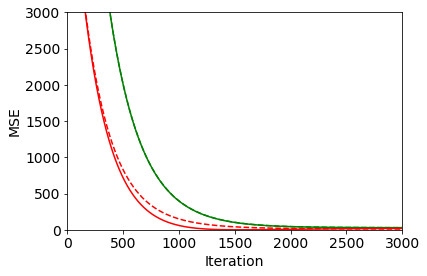

In [14]:
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.xlim( 0, 3000 )
plt.ylim( 0, 3000 )

plt.plot(range(len(GD_err_list_L2)), GD_err_list_L2, '--', color='g')
plt.plot(range(len(SGD_err_list_L2)), SGD_err_list_L2, '--', color='r')
plt.plot(range(len(GD_err_list)), GD_err_list, color='g')
plt.plot(range(len(SGD_err_list)), SGD_err_list, color='r')


Добавив L2 регуляризацию, веса при бОльшем коэффициенте lambda становятся равнее друг другу. При этом ухудшается сходимость у стахостического метода (пунктирная линия).

3. [\*] Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [15]:
# Метод градиентного спуска + L1
def eval_GD_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    GD_err_list = []
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * w / abs(w))
        GD_err_list.insert(i - 1, err)
#        if i % (iterations / 5) == 0:
#            print(i, w, err)
    return w, GD_err_list

In [16]:
## Стохастический градиентный спуск (Stochastic Gradient Descent, SGD)  + L1
# mini-batch GD & SGD (qty_in_batch=1)
def eval_SGD_reg1(X, y, iterations, qty_in_batch=1, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    SGD_err_list = []
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp) + lambda_ * w / abs(w))
        SGD_err_list.insert(i - 1, err)
#        if i % (iterations / 5) == 0:
#            print(i, w, err)
    return w, SGD_err_list

In [17]:
%%time

w_gd_L1, GD_err_list_L1 = eval_GD_reg1(X, y, iterations=3000, alpha=1e-3, lambda_=1e-3)
y_pred = np.dot(X, w_gd_L1)
err_gd = calc_mse(y, y_pred)
print(f'MSE для метода градиентного спуска - {err_gd}\n')

MSE для метода градиентного спуска - 29.471027876781186

Wall time: 61 ms


In [18]:
%%time

w_sgd_L1, SGD_err_list_L1 = eval_SGD_reg1(X, y, iterations=3000, qty_in_batch=1, alpha=1e-3, lambda_=1e-3) 
y_pred = np.dot(X, w_sgd_L1)
err_sgd = calc_mse(y, y_pred)
print(f'MSE для метода стохастического градиентного спуска - {err_gd}\n')

MSE для метода стохастического градиентного спуска - 29.471027876781186

Wall time: 4.93 s


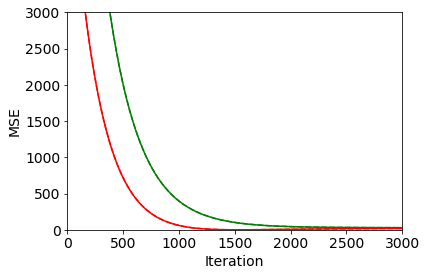

In [19]:
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.xlim( 0, 3000 )
plt.ylim( 0, 3000 )

plt.plot(range(len(GD_err_list_L1)), GD_err_list_L1, '--', color='g')
plt.plot(range(len(SGD_err_list_L1)), SGD_err_list_L1, '--', color='r')
plt.plot(range(len(GD_err_list)), GD_err_list, color='g')
plt.plot(range(len(SGD_err_list)), SGD_err_list, color='r')


Добавив L1 регуляризацию, веса изменяются меньше, при том же коэффициенте lambda, чем при L2 регуляризации.

4. [\*] Построить график изменения весов от числа итераций при GD и SGD (на одном рисунке).

In [20]:
# Метод градиентного спуска
def eval_GD_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    GD_ws = []
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * w / abs(w))
        GD_ws.extend(w)
#        if i % (iterations / 5) == 0:
#            print(i, w, err)
    return w, GD_ws

In [21]:
## Стохастический градиентный спуск (Stochastic Gradient Descent, SGD)
# mini-batch GD & SGD (qty_in_batch=1)
def eval_SGD_reg1(X, y, iterations, qty_in_batch=1, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0] # число наблюдений
    n_batch = n // qty_in_batch
    SGD_ws = []
    if n % qty_in_batch != 0:
        n_batch += 1
    # print(n_batch)
    for i in range(1, iterations + 1):
        for b in range(n_batch):
            start_ = qty_in_batch * b
            end_ = qty_in_batch * (b + 1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, w)
            err = calc_mse(y_tmp, y_pred_tmp)
            w -= alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp) + lambda_ * w / abs(w))
        SGD_ws.extend(w)
        if i % (iterations / 5) == 0:
            print(i, w, err)
    return w, SGD_ws

In [22]:
%%time

w_gd_L1, GD_ws = eval_GD_reg1(X, y, iterations=3000, alpha=1e-2, lambda_=1e-3)
y_pred = np.dot(X, w_gd_L1)
err_gd = calc_mse(y, y_pred)
print(f'MSE для метода градиентного спуска - {err_gd}\n')

MSE для метода градиентного спуска - 28.76491153675767

Wall time: 138 ms


In [23]:
%%time

w_sgd_L1, SGD_ws = eval_SGD_reg1(X, y, iterations=3000, qty_in_batch=1, alpha=1e-3, lambda_=1e-3) 
y_pred = np.dot(X, w_sgd_L1)
err_sgd = calc_mse(y, y_pred)
print(f'MSE для метода стохастического градиентного спуска - {err_gd}\n')

600 [51.98141302 52.26082289] 459.73220357352074
1200 [72.66643682 67.74602322] 15.671810287973884
1800 [81.03282306 72.26756568] 3.0647366540474335
2400 [84.43418475 73.5645401 ] 13.312459540019232
3000 [85.82243237 73.92654873] 18.425052904229126
MSE для метода стохастического градиентного спуска - 28.76491153675767

Wall time: 4.86 s


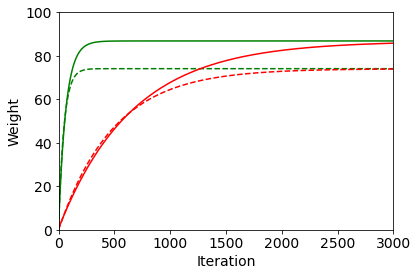

In [24]:
plt.xlabel('Iteration')
plt.ylabel('Weight')
plt.xlim( 0, 3000 )
plt.ylim( 0, 100 )

plt.plot(range(int(len(GD_ws) / 2)), GD_ws[::2], color='g')
plt.plot(range(int(len(GD_ws) / 2)), GD_ws[1::2], '--', color='g')
plt.plot(range(int(len(SGD_ws) / 2)), SGD_ws[::2], color='r')
plt.plot(range(int(len(SGD_ws) / 2)), SGD_ws[1::2], '--', color='r')

Для наглядности для градиентного спуска (зеленые линии) alpha=1e-2, для стахостического гр. спуска (красные линии) alpha=1e-3. 

5. [\*] Построить график изменения весов для L1 и L2 регуляризации от коэффициента регуляризации.

In [25]:
%%time
ws1_list = []
ws2_list = []
for i in range(0, 100):
  w_gd_L1, GD_ws = eval_GD_reg1(X, y, iterations=500, alpha=1e-2, lambda_= i)
  w_gd_L2, GD_ws = eval_GD_reg2(X, y, iterations=500, alpha=1e-2, lambda_= i)
  ws1_list.extend(w_gd_L1)
  ws2_list.extend(w_gd_L2)

Wall time: 1.75 s


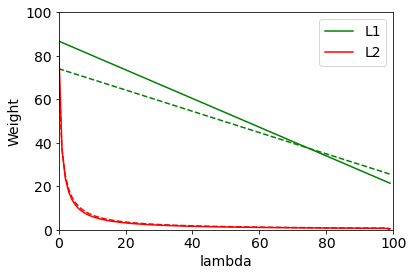

In [26]:
plt.xlabel('lambda')
plt.ylabel('Weight')
plt.xlim( 0, 100 )
plt.ylim( 0, 100 )

plt.plot(range(int(len(ws1_list) / 2)), ws1_list[::2], color='g', label='L1')
plt.plot(range(int(len(ws1_list) / 2)), ws1_list[1::2], '--', color='g')
plt.plot(range(int(len(ws2_list) / 2)), ws2_list[::2], color='r', label='L2')
plt.plot(range(int(len(ws2_list) / 2)), ws2_list[1::2], '--', color='r')
plt.legend();